<a href="https://colab.research.google.com/github/anujott-codes/Credit-Loan-Approval/blob/main/Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [104]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from collections import Counter
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,roc_curve
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

##Loan Approval

###Import Dataset

In [54]:
#using loan approval dataset from kaggle
loan_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project/Credit Card and Loan Approval/loan_approval_dataset.csv')
loan_df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

In [55]:
loan_df = loan_df.drop(columns=['loan_id'])
loan_df.head()

no_of_dependents      education self_employed  income_annum  loan_amount  \
0                 2       Graduate            No       9600000     29900000   
1                 0   Not Graduate           Yes       4100000     12200000   
2                 3       Graduate            No       9100000     29700000   
3                 3       Graduate            No       8200000     30700000   
4                 5   Not Graduate           Yes       9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value loan_status  
0             22700000           8000000    Approved  
1              8800000           3300000    Rejected  
2             33300000          12800000    Rejected  
3             23300000           7900000    Rejected  
4             29400000           5000000    Rejected

In [56]:
loan_df = loan_df.rename(columns={
    ' income_annum':'annual_income',
    ' no_of_dependents':'no_of_dependents',
    ' education':'education',
    ' self_employed':'self_employed',
    ' loan_amount':'loan_amount',
    ' loan_term':'loan_term',
    ' cibil_score':'cibil_score',
    ' residential_assets_value':'residential_assets_value',
    ' commercial_assets_value':'commercial_assets_value',
    ' luxury_assets_value':'luxury_assets_value',
    ' bank_asset_value':'bank_asset_value',
    ' loan_status':'loan_status'
    })

##EDA

In [57]:
#Basic info about the dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   annual_income             4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [58]:
#shape of the dataset
loan_df.shape

(4269, 12)

In [59]:
#checking for null values
loan_df.isna().sum()

no_of_dependents            0
education                   0
self_employed               0
annual_income               0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [60]:
#checking for duplicated values
loan_df.duplicated().sum()

np.int64(0)

In [61]:
#description about the data
loan_df.describe()

no_of_dependents  annual_income   loan_amount    loan_term  \
count       4269.000000   4.269000e+03  4.269000e+03  4269.000000   
mean           2.498712   5.059124e+06  1.513345e+07    10.900445   
std            1.695910   2.806840e+06  9.043363e+06     5.709187   
min            0.000000   2.000000e+05  3.000000e+05     2.000000   
25%            1.000000   2.700000e+06  7.700000e+06     6.000000   
50%            3.000000   5.100000e+06  1.450000e+07    10.000000   
75%            4.000000   7.500000e+06  2.150000e+07    16.000000   
max            5.000000   9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06             4.388966e+06   
min     300.000000             -1.000000e+05             0.000000e+00   
25%     453.000000              2.200000e+06             1.300000e+06   
50%     600.000000              5.600000e+06             3.700000e+06   
75%     748.000000              1.130000e+07             7.600000e+06   
max     900.000000              2.910000e+07             1.940000e+07   

       luxury_assets_value  bank_asset_value  
count         4.269000e+03      4.269000e+03  
mean          1.512631e+07      4.976692e+06  
std           9.103754e+06      3.250185e+06  
min           3.000000e+05      0.000000e+00  
25%           7.500000e+06      2.300000e+06  
50%           1.460000e+07      4.600000e+06  
75%           2.170000e+07      7.100000e+06  
max           3.920000e+07      1.470000e+07

In [62]:
#extracting numerical features
numerical_features = loan_df.select_dtypes(exclude='O').columns.to_list()
print("----- Numerical Features -----")
print(numerical_features)
print(f"Total: {len(numerical_features)}")

print('\n')

#extracting categorical features
categorical_features = loan_df.select_dtypes(include='O').columns.to_list()
print("----- Categorical Features -----")
print(categorical_features)
print(f"Total: {len(categorical_features)}")

----- Numerical Features -----
['no_of_dependents', 'annual_income', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Total: 9


----- Categorical Features -----
['education', 'self_employed', 'loan_status']
Total: 3


In [63]:
#function to plot distributions
def plot(df, col ,num):
  plt.subplot(4,4,num)
  sns.histplot(data = df,x=col,kde=True, color='skyblue')
  plt.title(f"{col} Distribution")
  plt.xlabel(" ")

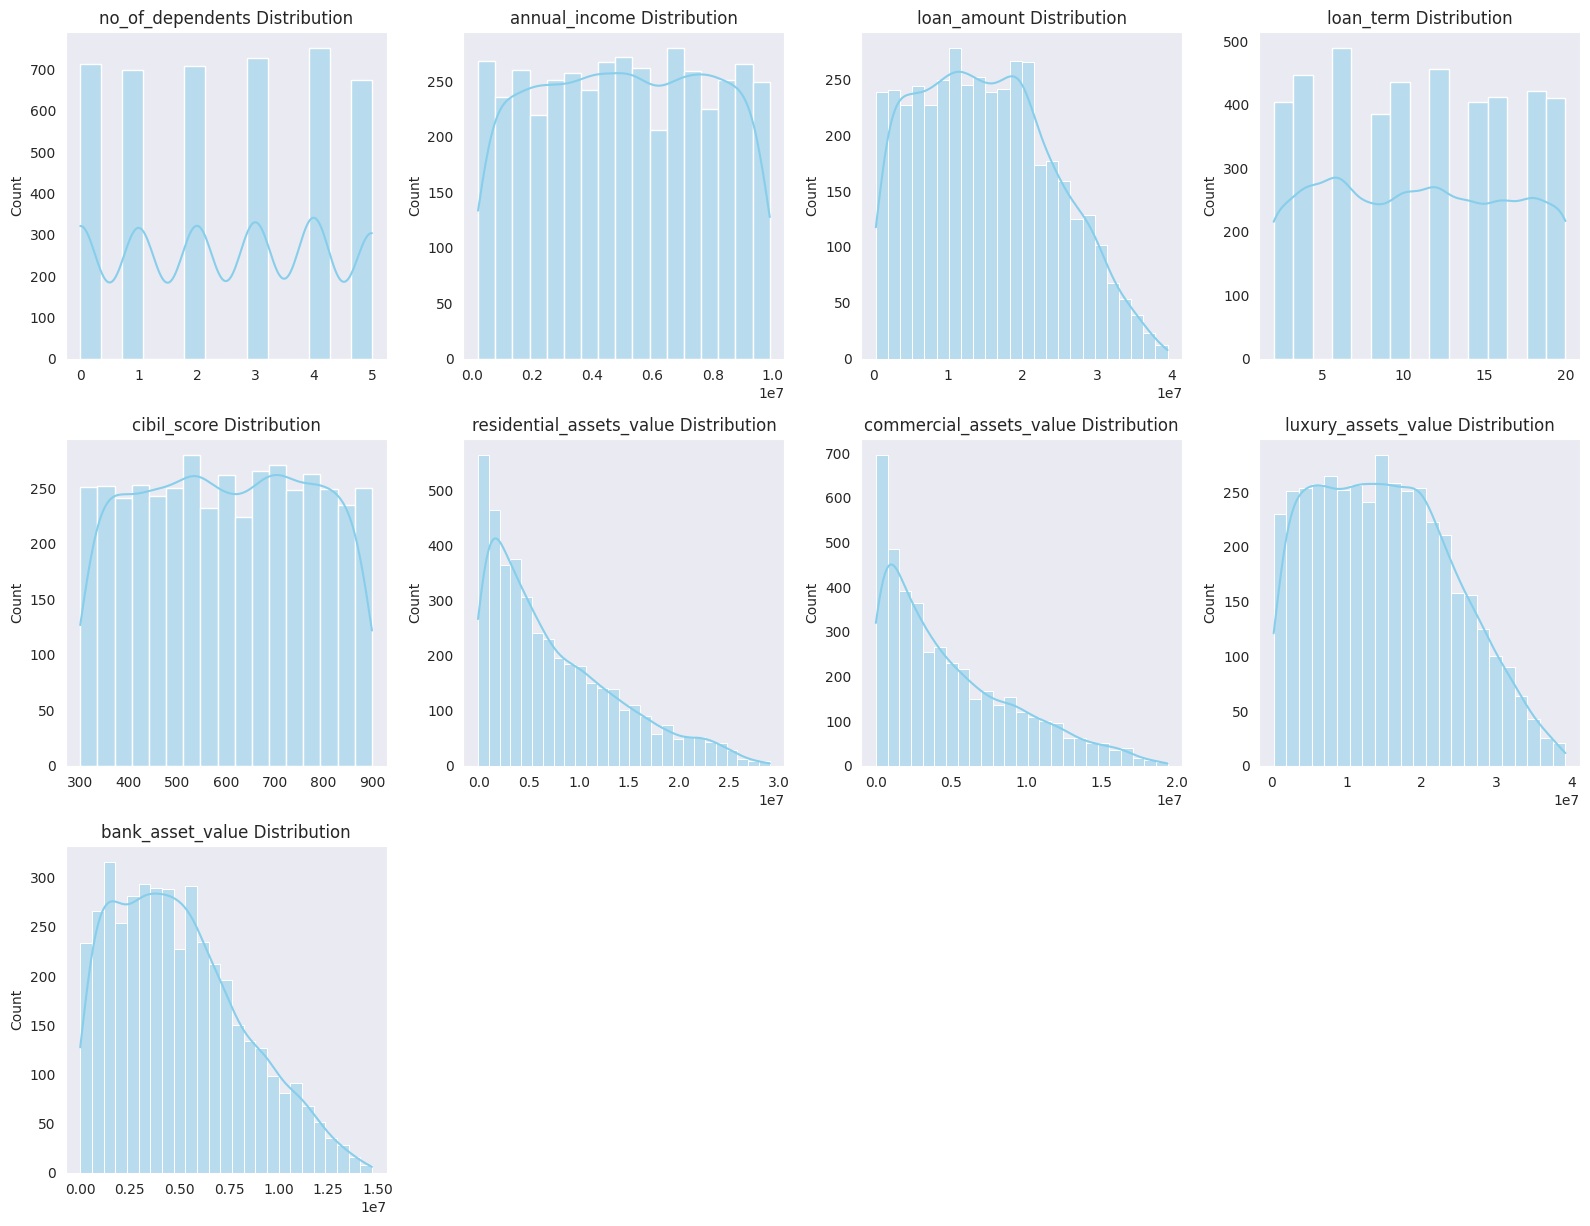

In [64]:
#plotting distributions
plt.figure(figsize=(16,16))
for i,col in enumerate(numerical_features):
  plot(loan_df,col,i+1)

plt.tight_layout()
plt.show()


In [65]:
#function for pie chart
def pie_plot(col, num, df=loan_df):
    plt.subplot(3,3,num)
    plt.pie(
        df[col].value_counts(),
        labels=df[col].value_counts().index,
        autopct='%1.1f%%',
        colors=sns.color_palette('pastel')
    )
    plt.title(f"{col} Distribution")

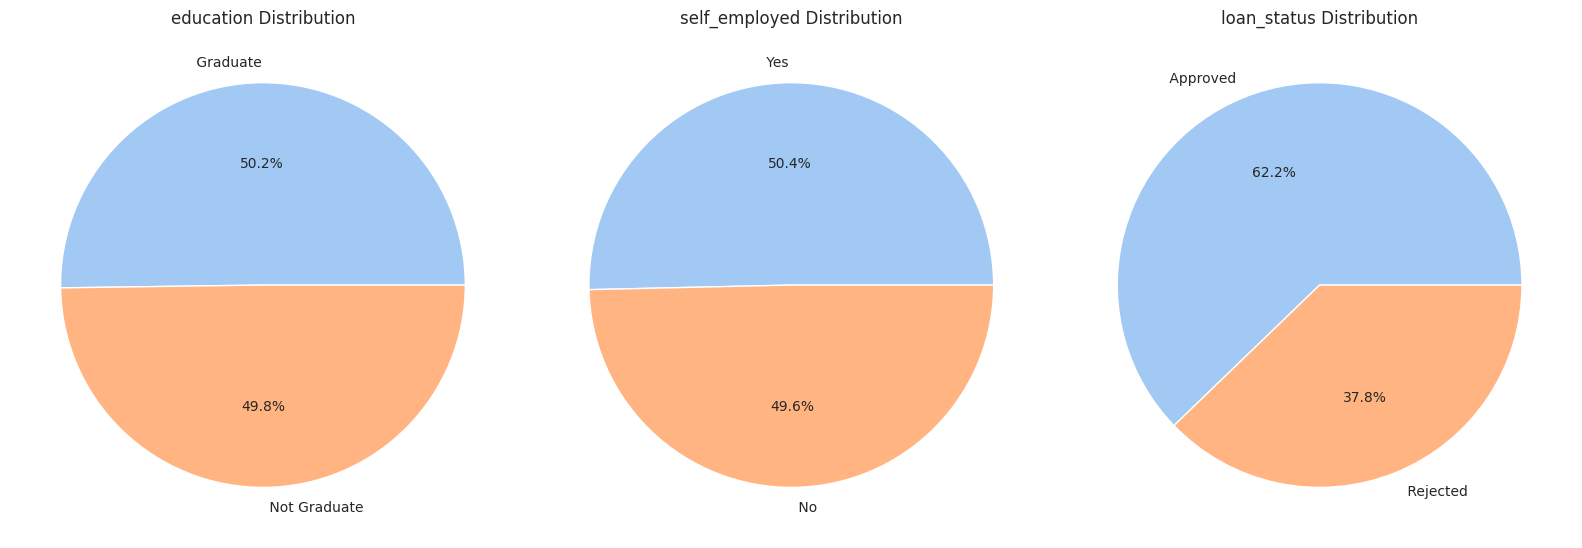

In [66]:
#pie chart for categorical features
plt.figure(figsize=(16,16))
for i,col in enumerate(categorical_features):
  pie_plot(col,i+1)

plt.tight_layout()
plt.show()

In [67]:
#converting target column into binary from categorical
loan_df['loan_status'].unique()
loan_df['loan_status'] = loan_df['loan_status'].map({' Approved':1,' Rejected':0})
loan_df['loan_status'] = loan_df['loan_status'].astype('int')
loan_df.head()

no_of_dependents      education self_employed  annual_income  loan_amount  \
0                 2       Graduate            No        9600000     29900000   
1                 0   Not Graduate           Yes        4100000     12200000   
2                 3       Graduate            No        9100000     29700000   
3                 3       Graduate            No        8200000     30700000   
4                 5   Not Graduate           Yes        9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  loan_status  
0             22700000           8000000            1  
1              8800000           3300000            0  
2             33300000          12800000            0  
3             23300000           7900000            0  
4             29400000           5000000            0

In [68]:
#removing leading spaces for categorical columns
loan_df['education'] = loan_df['education'].apply(lambda x: x.lstrip())
loan_df['self_employed'] = loan_df['self_employed'].apply(lambda x: x.lstrip())

In [69]:
#rechecking transformations
print(loan_df['education'].unique())
print(loan_df['self_employed'].unique())

['Graduate' 'Not Graduate']
['No' 'Yes']


In [70]:
#encoding education and self_employed
loan_df['education'] = loan_df['education'].map({'Graduate':1,'Not Graduate':0})
loan_df['education'] = loan_df['education'].astype('int')

loan_df['self_employed'] = loan_df['self_employed'].map({'Yes':1,'No':0})
loan_df['self_employed'] = loan_df['self_employed'].astype('int')

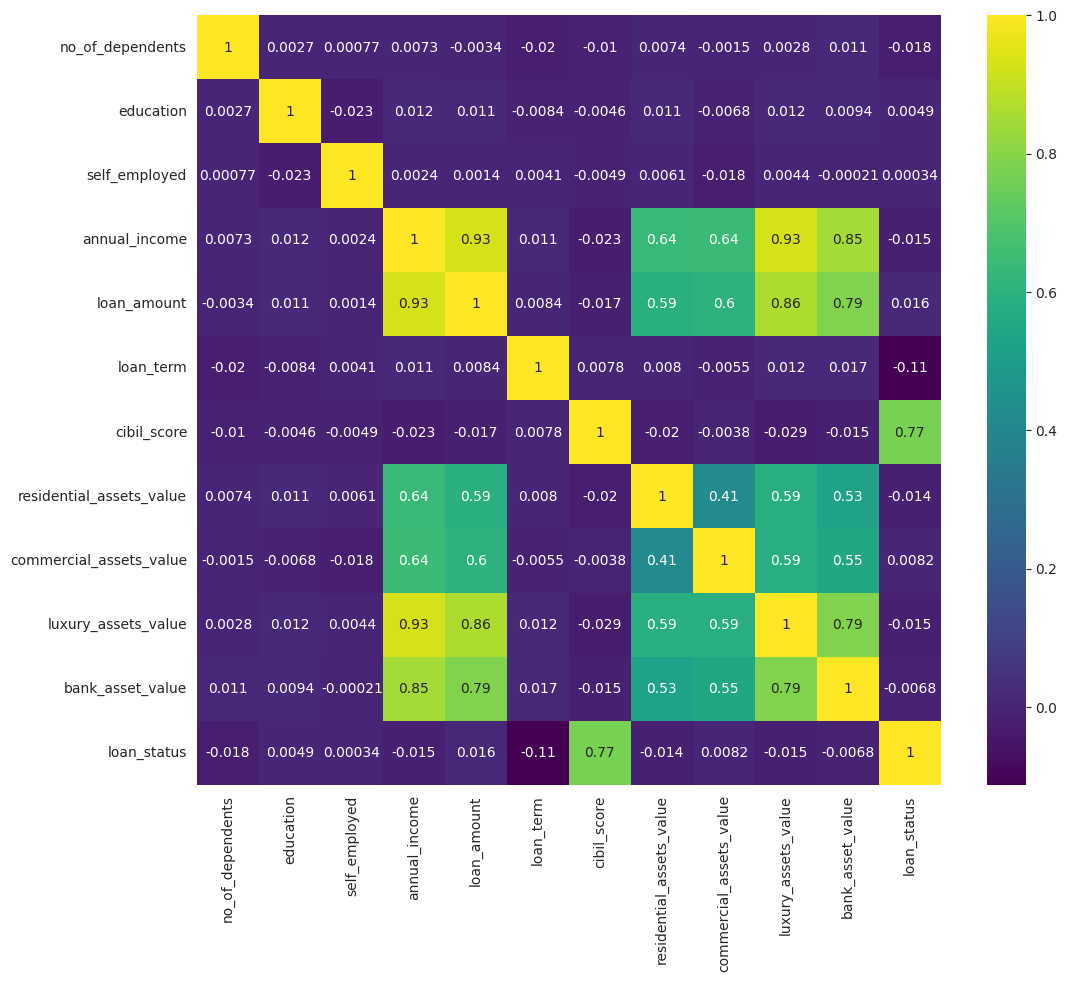

In [71]:
#check collinearity and feature correlation
plt.figure(figsize=(12,10))
numeric_df = loan_df.select_dtypes(exclude='O')
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, cmap='viridis',annot=True)
plt.show()

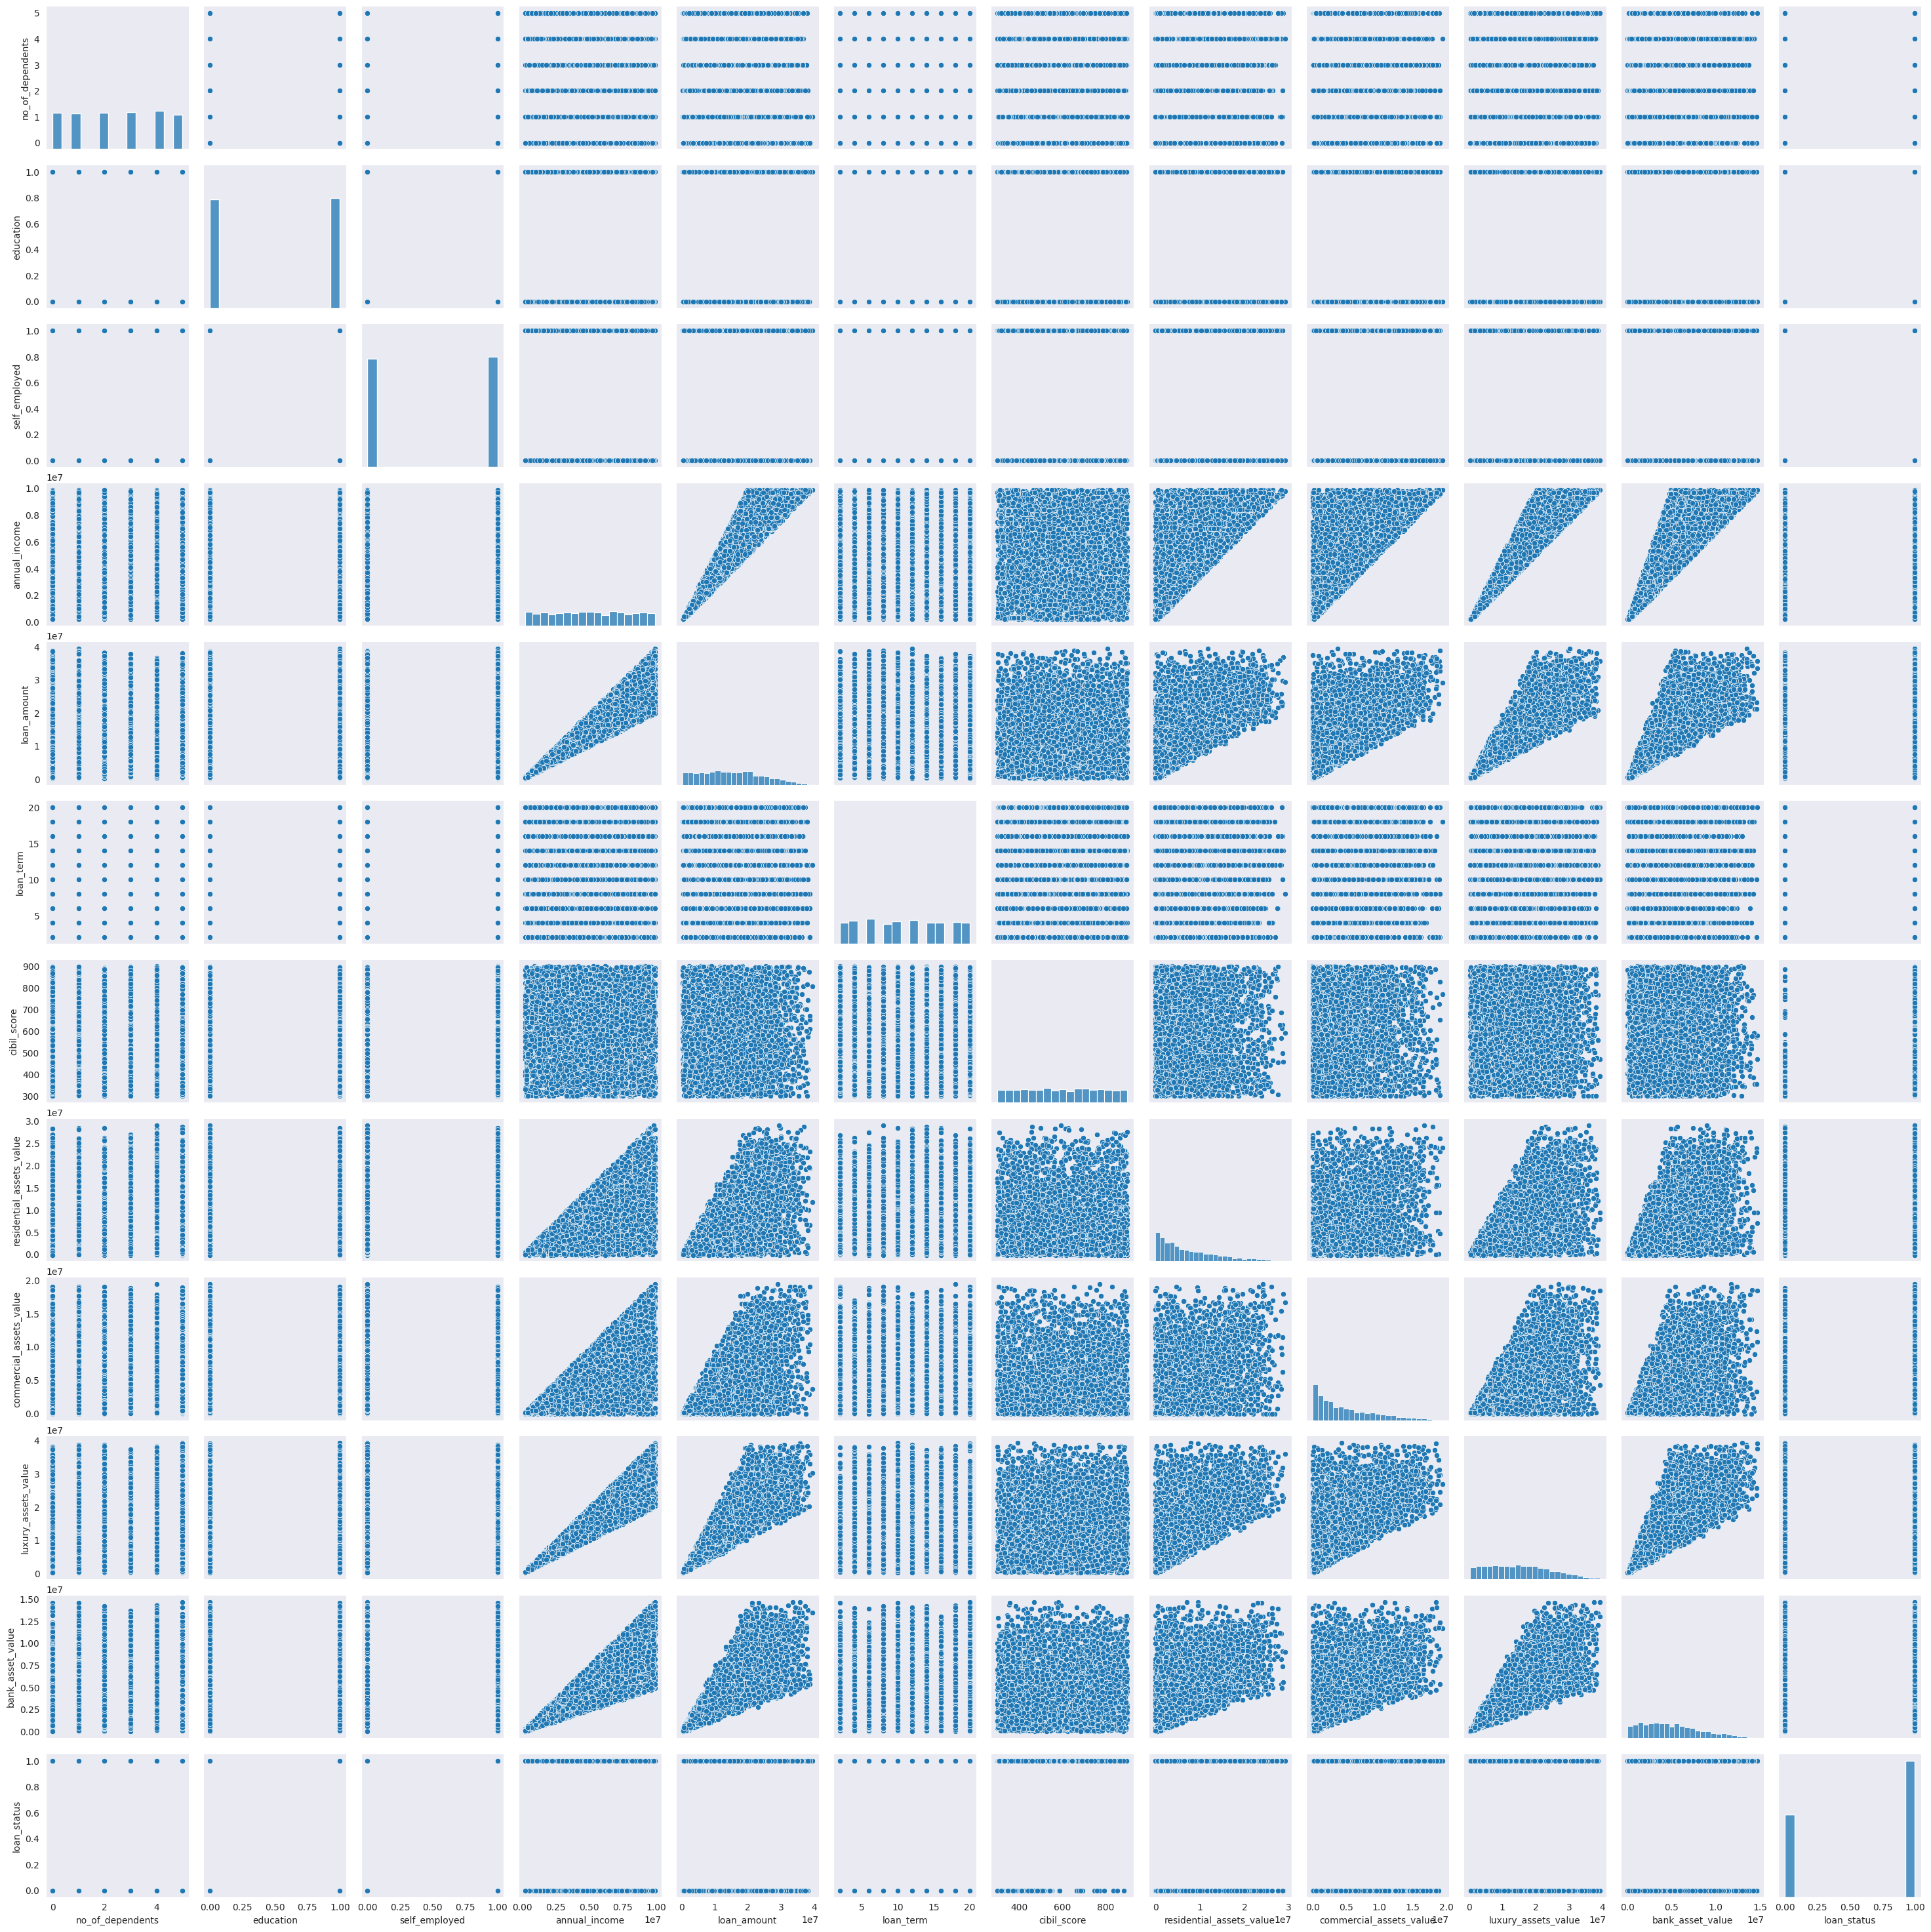

In [72]:
#pairplot
sns.pairplot(data=loan_df)
plt.show()

In [73]:
final_df = loan_df.copy()
final_df.shape

(4269, 12)

In [74]:
#extracting numerical features
numerical_features = final_df.select_dtypes(exclude='O').columns.to_list()
print("----- Numerical Features -----")
print(numerical_features)
print(f"Total: {len(numerical_features)}")

----- Numerical Features -----
['no_of_dependents', 'education', 'self_employed', 'annual_income', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']
Total: 12


In [75]:
#function for box plot to analyse outliers
def boxplot(col,num,df=final_df):
  plt.subplot(4,3,num)
  sns.set_style('dark')
  sns.boxplot(data = df,x = col, color='purple')
  plt.title(f'{col} Boxplot Distribution')

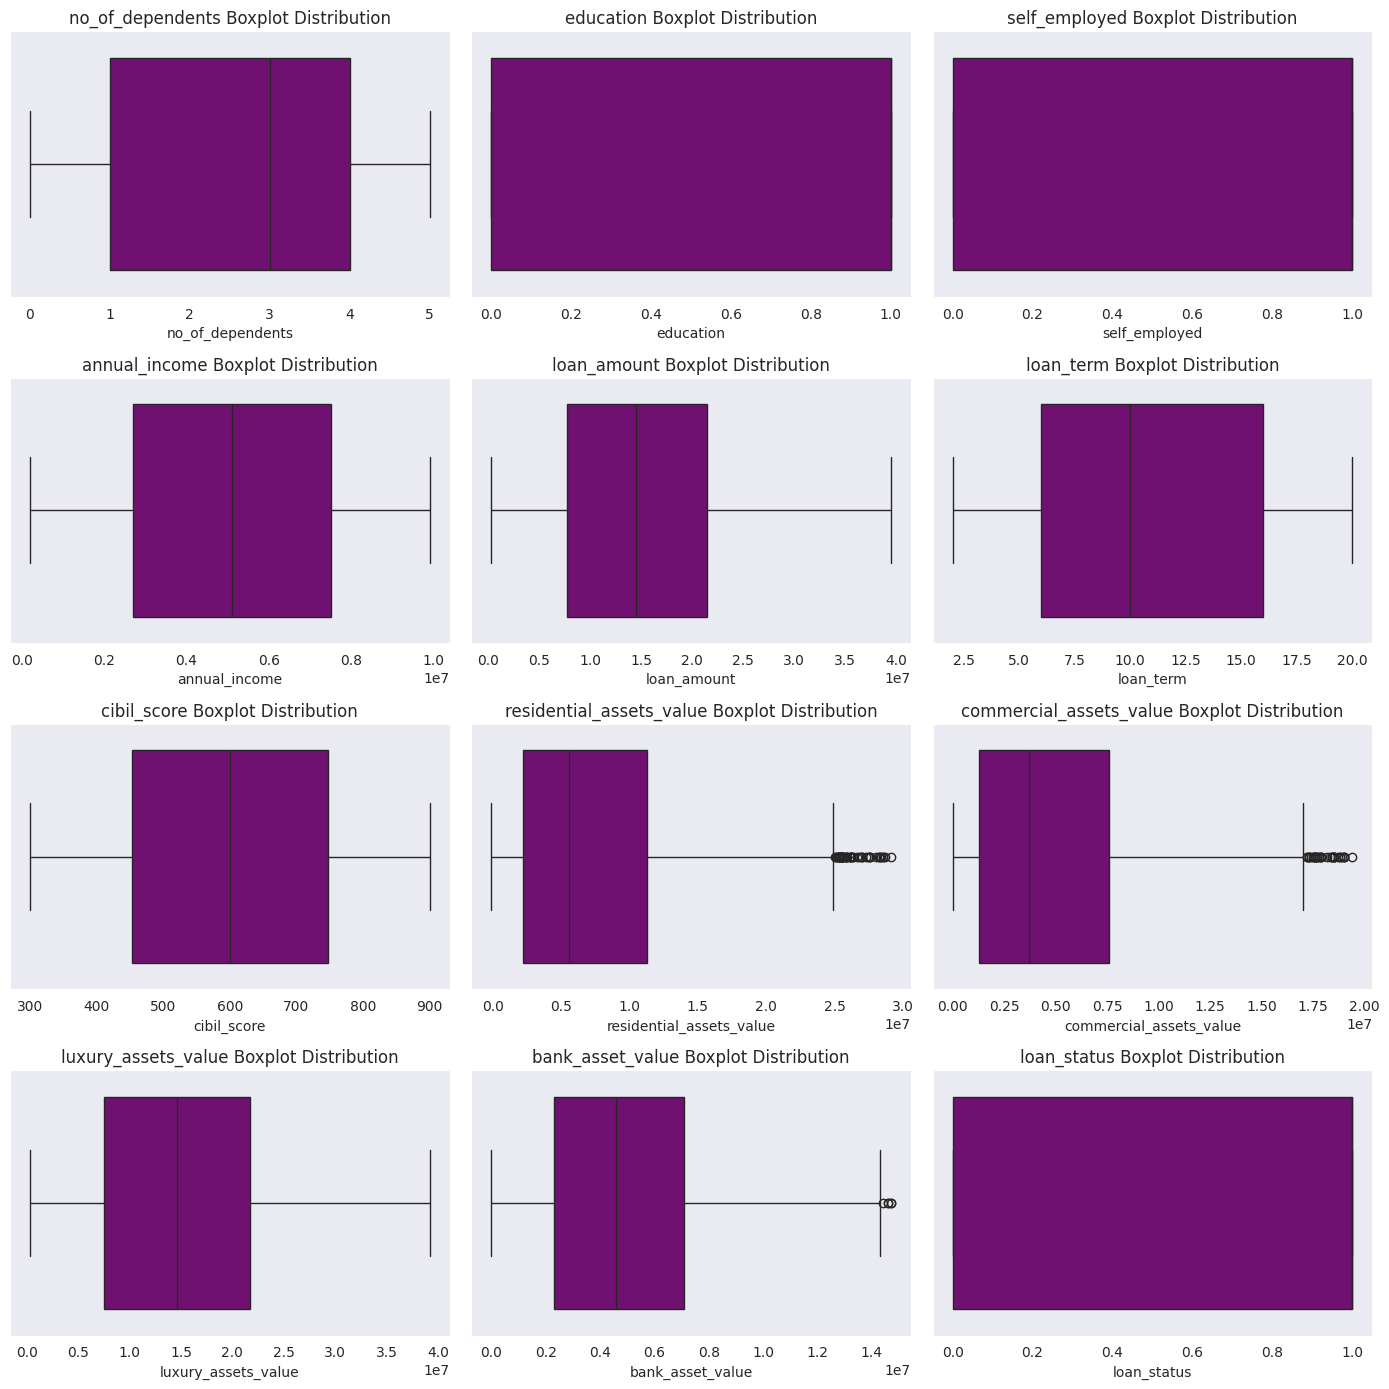

In [76]:
#plotting boxplot for continuous distributions
plt.figure(figsize=(14,14))
for i,col in enumerate(numerical_features):
  boxplot(col,i+1)

plt.tight_layout()
plt.show()

##Data Split

In [77]:
X = final_df.drop(columns=['loan_status'])
y = final_df['loan_status']

In [78]:
X.head()

no_of_dependents  education  self_employed  annual_income  loan_amount  \
0                 2          1              0        9600000     29900000   
1                 0          0              1        4100000     12200000   
2                 3          1              0        9100000     29700000   
3                 3          1              0        8200000     30700000   
4                 5          0              1        9800000     24200000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         12          778                   2400000                 17600000   
1          8          417                   2700000                  2200000   
2         20          506                   7100000                  4500000   
3          8          467                  18200000                  3300000   
4         20          382                  12400000                  8200000   

   luxury_assets_value  bank_asset_value  
0             22700000           8000000  
1              8800000           3300000  
2             33300000          12800000  
3             23300000           7900000  
4             29400000           5000000

In [79]:
X.shape

(4269, 11)

In [80]:
#data split for training set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [81]:
X_train.head()

no_of_dependents  education  self_employed  annual_income  loan_amount  \
1877                 4          1              0        4800000     14300000   
1729                 3          1              1        5800000     16700000   
164                  2          1              1        8100000     22300000   
2298                 2          0              1        4400000     13900000   
2461                 5          1              0        6500000     24800000   

      loan_term  cibil_score  residential_assets_value  \
1877          6          795                   5900000   
1729         18          633                   8100000   
164          18          737                  22300000   
2298          6          810                  13200000   
2461          8          779                   7000000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  
1877                        0             11100000           2600000  
1729                  8400000             14700000           3700000  
164                  12600000             27000000           7300000  
2298                  4200000             15000000           5200000  
2461                  9600000             15700000           8800000

In [82]:
X_test.head()

no_of_dependents  education  self_employed  annual_income  loan_amount  \
2856                 3          0              1        8300000     31400000   
3176                 4          0              1        3100000      8200000   
477                  1          1              0        8000000     31900000   
4023                 0          0              0        3800000     13300000   
134                  3          0              0        1500000      5500000   

      loan_term  cibil_score  residential_assets_value  \
2856          6          674                   1000000   
3176         18          408                   2900000   
477          12          504                  23800000   
4023          6          655                   9600000   
134          16          717                   2100000   

      commercial_assets_value  luxury_assets_value  bank_asset_value  
2856                  1600000             17200000           6100000  
3176                  3800000             10800000           3100000  
477                   1500000             22100000           6000000  
4023                        0              8600000           2600000  
134                    800000              4400000           1300000

In [83]:
numerical_features

['no_of_dependents',
 'education',
 'self_employed',
 'annual_income',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status']

In [84]:
#setup preprocessor
features_to_pass = ['education','self_employed']
scaling_features = numerical_features
scaling_features.remove('education')
scaling_features.remove('self_employed')
scaling_features.remove('loan_status')


preprocessor = ColumnTransformer(
    transformers =[
        ('bin','passthrough',features_to_pass),
        ('num',StandardScaler(),scaling_features)
    ]
)

#preprocessing X_train and X_test
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [85]:
#saving preprocessor for deployment
joblib.dump(preprocessor,'loan_preprocessor.pkl')

['loan_preprocessor.pkl']

In [86]:
X_train_preprocessed

array([[ 1.        ,  0.        ,  0.89071783, ..., -1.13730558,
        -0.44443983, -0.73682658],
       [ 1.        ,  1.        ,  0.30110717, ...,  0.78599456,
        -0.04838711, -0.39679525],
       [ 1.        ,  1.        , -0.28850349, ...,  1.74764462,
         1.30479299,  0.71603457],
       ...,
       [ 1.        ,  1.        ,  0.30110717, ...,  0.32806595,
        -0.3894325 , -0.42770719],
       [ 1.        ,  0.        , -1.46772481, ..., -0.83965199,
        -0.6974735 ,  0.37600323],
       [ 1.        ,  0.        ,  0.30110717, ...,  1.47288746,
         1.43681056,  2.10707184]])

In [87]:
#checking class imbalance
print("Train:", Counter(y_train))
print("Test:", Counter(y_test))

Train: Counter({1: 2125, 0: 1290})
Test: Counter({1: 531, 0: 323})


##Model Selection

In [88]:
#Logistic Regression
lr = LogisticRegression(random_state = 42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold CV
lr_scores = cross_val_score(lr, X_train_preprocessed, y_train, cv=skf, scoring='accuracy')

print("Accuracy scores for each fold:", lr_scores)
print("Mean accuracy:", lr_scores.mean())
print("Standard deviation:", lr_scores.std())

Accuracy scores for each fold: [0.9238653  0.93265007 0.89458272 0.92532943 0.89604685]
Mean accuracy: 0.9144948755490482
Standard deviation: 0.01594758278675269


In [89]:
#SVC
svc = SVC(random_state = 42,probability=True)

# Perform 5-fold CV
svc_scores = cross_val_score(svc, X_train_preprocessed, y_train, cv=skf, scoring='accuracy')

print("Accuracy scores for each fold:", svc_scores)
print("Mean accuracy:", svc_scores.mean())
print("Standard deviation:", svc_scores.std())


Accuracy scores for each fold: [0.94729136 0.94289898 0.94875549 0.94729136 0.92240117]
Mean accuracy: 0.9417276720351392
Standard deviation: 0.009860883303357403


In [90]:
#KNN
knn = KNeighborsClassifier()

# Perform 5-fold CV
knn_scores = cross_val_score(knn, X_train_preprocessed, y_train, cv=skf, scoring='accuracy')

print("Accuracy scores for each fold:", knn_scores)
print("Mean accuracy:", knn_scores.mean())
print("Standard deviation:", knn_scores.std())

Accuracy scores for each fold: [0.9136164  0.90922401 0.89311859 0.89311859 0.88872621]
Mean accuracy: 0.8995607613469986
Standard deviation: 0.009912919988176165


In [91]:
#Naive Bayes
nb = GaussianNB()

# Perform 5-fold CV
nb_scores = cross_val_score(nb, X_train_preprocessed, y_train, cv=skf, scoring='accuracy')

print("Accuracy scores for each fold:", nb_scores)
print("Mean accuracy:", nb_scores.mean())
print("Standard deviation:", nb_scores.std())

Accuracy scores for each fold: [0.93997072 0.9341142  0.93557833 0.9238653  0.91068814]
Mean accuracy: 0.9288433382137627
Standard deviation: 0.010500978668838132


In [92]:
#RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-fold CV
rf_scores = cross_val_score(rf, X_train_preprocessed, y_train, cv=skf, scoring='accuracy')

print("Accuracy scores for each fold:", rf_scores)
print("Mean accuracy:", rf_scores.mean())
print("Standard deviation:", rf_scores.std())

Accuracy scores for each fold: [0.98243045 0.97218155 0.98535871 0.98243045 0.9795022 ]
Mean accuracy: 0.9803806734992679
Standard deviation: 0.004498474815735642


In [93]:
#GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=22)

# Perform 5-fold CV
gb_scores = cross_val_score(gb, X_train_preprocessed, y_train, cv=skf, scoring='accuracy')

print("Accuracy scores for each fold:", gb_scores)
print("Mean accuracy:", gb_scores.mean())
print("Standard deviation:", gb_scores.std())

Accuracy scores for each fold: [0.98243045 0.98096633 0.97510981 0.9795022  0.98682284]
Mean accuracy: 0.9809663250366032
Standard deviation: 0.003817980910806818


In [94]:
#XGBClassifier
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    objective='binary:logistic'
)

# Perform 5-fold CV
xgb_scores = cross_val_score(xgb, X_train_preprocessed, y_train, cv=skf, scoring='accuracy')

print("Accuracy scores for each fold:", xgb_scores)
print("Mean accuracy:", xgb_scores.mean())
print("Standard deviation:", xgb_scores.std())

Accuracy scores for each fold: [0.98682284 0.98682284 0.98243045 0.98243045 0.98535871]
Mean accuracy: 0.9847730600292826
Standard deviation: 0.001986040990666249


RandomForest, GradientBoosting and XGBoost perform well

##Evaluation on Testing Set

In [95]:
#Random Forest
rf.fit(X_train_preprocessed,y_train)

#prediction on training set
ypred_train_rf = rf.predict(X_train_preprocessed)

#prediction on testing set
ypred_test_rf = rf.predict(X_test_preprocessed)

#classifiction report for training set
clf_report_train_rf = classification_report(y_train,ypred_train_rf)
print("----- Classification report for Training Set -----")
print(clf_report_train_rf)

#classification report for testing set
clf_report_test_rf = classification_report(y_test,ypred_test_rf)
print("----- Classification report for Testing Set -----")
print(clf_report_test_rf)

----- Classification report for Training Set -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00      2125

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415

----- Classification report for Testing Set -----
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       323
           1       0.98      0.99      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [96]:
#Gradient Boosting
gb.fit(X_train_preprocessed,y_train)

#prediction on training set
ypred_train_gb = gb.predict(X_train_preprocessed)

#prediction on testing set
ypred_test_gb = gb.predict(X_test_preprocessed)

#classifiction report for training set
clf_report_train_gb = classification_report(y_train,ypred_train_gb)
print("----- Classification report for Training Set -----")
print(clf_report_train_gb)

#classification report for testing set
clf_report_test_gb = classification_report(y_test,ypred_test_gb)
print("----- Classification report for Testing Set -----")
print(clf_report_test_gb)

----- Classification report for Training Set -----
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1290
           1       1.00      1.00      1.00      2125

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415

----- Classification report for Testing Set -----
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       323
           1       0.98      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [97]:
#XGBoost
xgb.fit(X_train_preprocessed,y_train)

#prediction on training set
ypred_train_xgb = xgb.predict(X_train_preprocessed)

#prediction on testing set
ypred_test_xgb = xgb.predict(X_test_preprocessed)

#classifiction report for training set
clf_report_train_xgb = classification_report(y_train,ypred_train_xgb)
print("----- Classification report for Training Set -----")
print(clf_report_train_xgb)

#classification report for testing set
clf_report_test_xgb = classification_report(y_test,ypred_test_xgb)
print("----- Classification report for Testing Set -----")
print(clf_report_test_xgb)

----- Classification report for Training Set -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      1.00      1.00      2125

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415

----- Classification report for Testing Set -----
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.99      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



XGBoost performs best

##Hyper Parameter Tuning

In [98]:
#parameters
param_grid = {
    'max_depth': [3,4,5,6],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100,200],
    'subsample': [0.7,0.8],
    'colsample_bytree':[0.7,0.8],
    'gamma':[0,0.1],
    'reg_alpha':[0,0.01],
    'reg_lambda':[1,1.5]
}

#RandomSearchCV
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid,
                                 n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=200, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.05, 0.1],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [100, 200],
                                        'reg_alpha': [0, 0.01],
                                        'reg_lambda': [1, 1.5],
                                        'subsample': [0.7, 0.8]},
                   scoring='accuracy', verbose=2)

In [99]:
#best params and cv score

print("Best params:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

Best params: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best CV score: 0.9777425803886595


In [100]:
#tuned XGB for reducing overfitting
xgb = XGBClassifier(
    subsample= 0.7,
    reg_lambda= 1,
    reg_alpha= 0.01,
    n_estimators= 100,
    max_depth= 6,
    learning_rate= 0.05,
    gamma= 0.1,
    colsample_bytree= 0.8
)


xgb.fit(X_train_preprocessed,y_train)

#prediction on training set
ypred_train_xgb = xgb.predict(X_train_preprocessed)

#prediction on testing set
ypred_test_xgb = xgb.predict(X_test_preprocessed)

#classifiction report for training set
clf_report_train_xgb = classification_report(y_train,ypred_train_xgb)
print("----- Classification report for Training Set -----")
print(clf_report_train_xgb)

#classification report for testing set
clf_report_test_xgb = classification_report(y_test,ypred_test_xgb)
print("----- Classification report for Testing Set -----")
print(clf_report_test_xgb)

----- Classification report for Training Set -----
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1290
           1       0.99      1.00      1.00      2125

    accuracy                           1.00      3415
   macro avg       1.00      0.99      1.00      3415
weighted avg       1.00      1.00      1.00      3415

----- Classification report for Testing Set -----
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       323
           1       0.98      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



##Confusion Matrix, ROC-AUC Curve and Evaluation Metrics

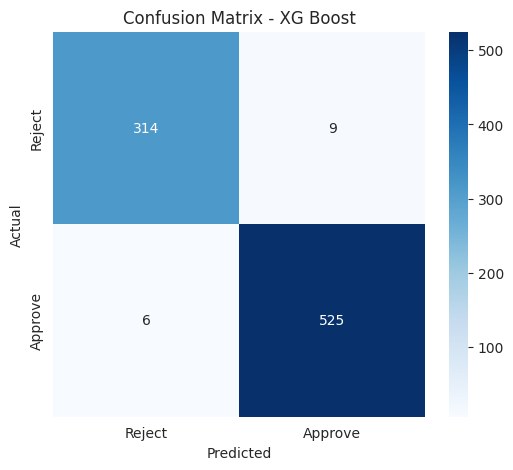

In [102]:
#confusion matrix
cm = confusion_matrix(y_test,ypred_test_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Reject','Approve'], yticklabels=['Reject','Approve'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XG Boost')
plt.show()

In [103]:
#Classification Report
print("------ Classification Report XG Boost ------")
print(clf_report_test_xgb)

------ Classification Report XG Boost ------
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       323
           1       0.98      0.99      0.99       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



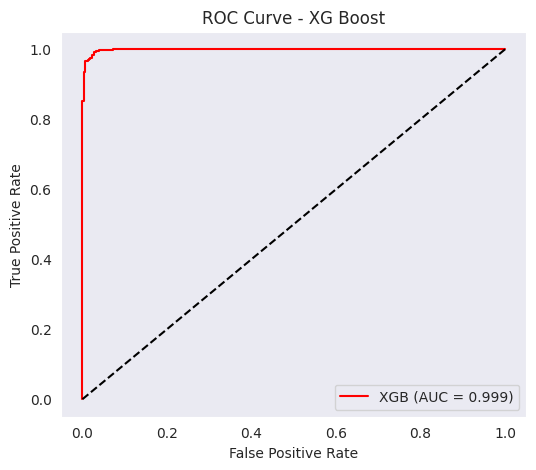

In [105]:
#ROC-AUC curve
yprob_xgb = xgb.predict_proba(X_test_preprocessed)[:,1]
auc_score = roc_auc_score(y_test, yprob_xgb)
fpr, tpr, thresholds = roc_curve(y_test, yprob_xgb)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"XGB (AUC = {auc_score:.3f})",color='red')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XG Boost')
plt.legend(loc='lower right')
plt.show()

In [106]:
#saving the model
joblib.dump(xgb,'loan_model.pkl')

['loan_model.pkl']